In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

**DATASET -**
**Automotive Vehicle Engine Health**

In [3]:
data = pd.read_csv(r"/workspaces/DAPR-Model/dataset/engine_data.csv")

**Understanding the Data**

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine rpm,19535.0,791.239263,267.611193,61.000000,593.000000,746.000000,934.000000,2239.000000
Lub oil pressure,19535.0,3.303775,1.021643,0.003384,2.518815,3.162035,4.055272,7.265566
Fuel pressure,19535.0,6.655615,2.761021,0.003187,4.916886,6.201720,7.744973,21.138326
Coolant pressure,19535.0,2.335369,1.036382,0.002483,1.600466,2.166883,2.848840,7.478505
lub oil temp,19535.0,77.643420,3.110984,71.321974,75.725990,76.817350,78.071691,89.580796
Coolant temp,19535.0,78.427433,6.206749,61.673325,73.895421,78.346662,82.915411,195.527912
Engine Condition,19535.0,0.630509,0.482679,0.000000,0.000000,1.000000,1.000000,1.000000


In [5]:
data.shape

(19535, 7)

**Checking Missing Values**

In [6]:
data.isnull().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

**Checking for Duplicates**

In [7]:
data.duplicated().sum()

0

**Outlier detection and Handling**

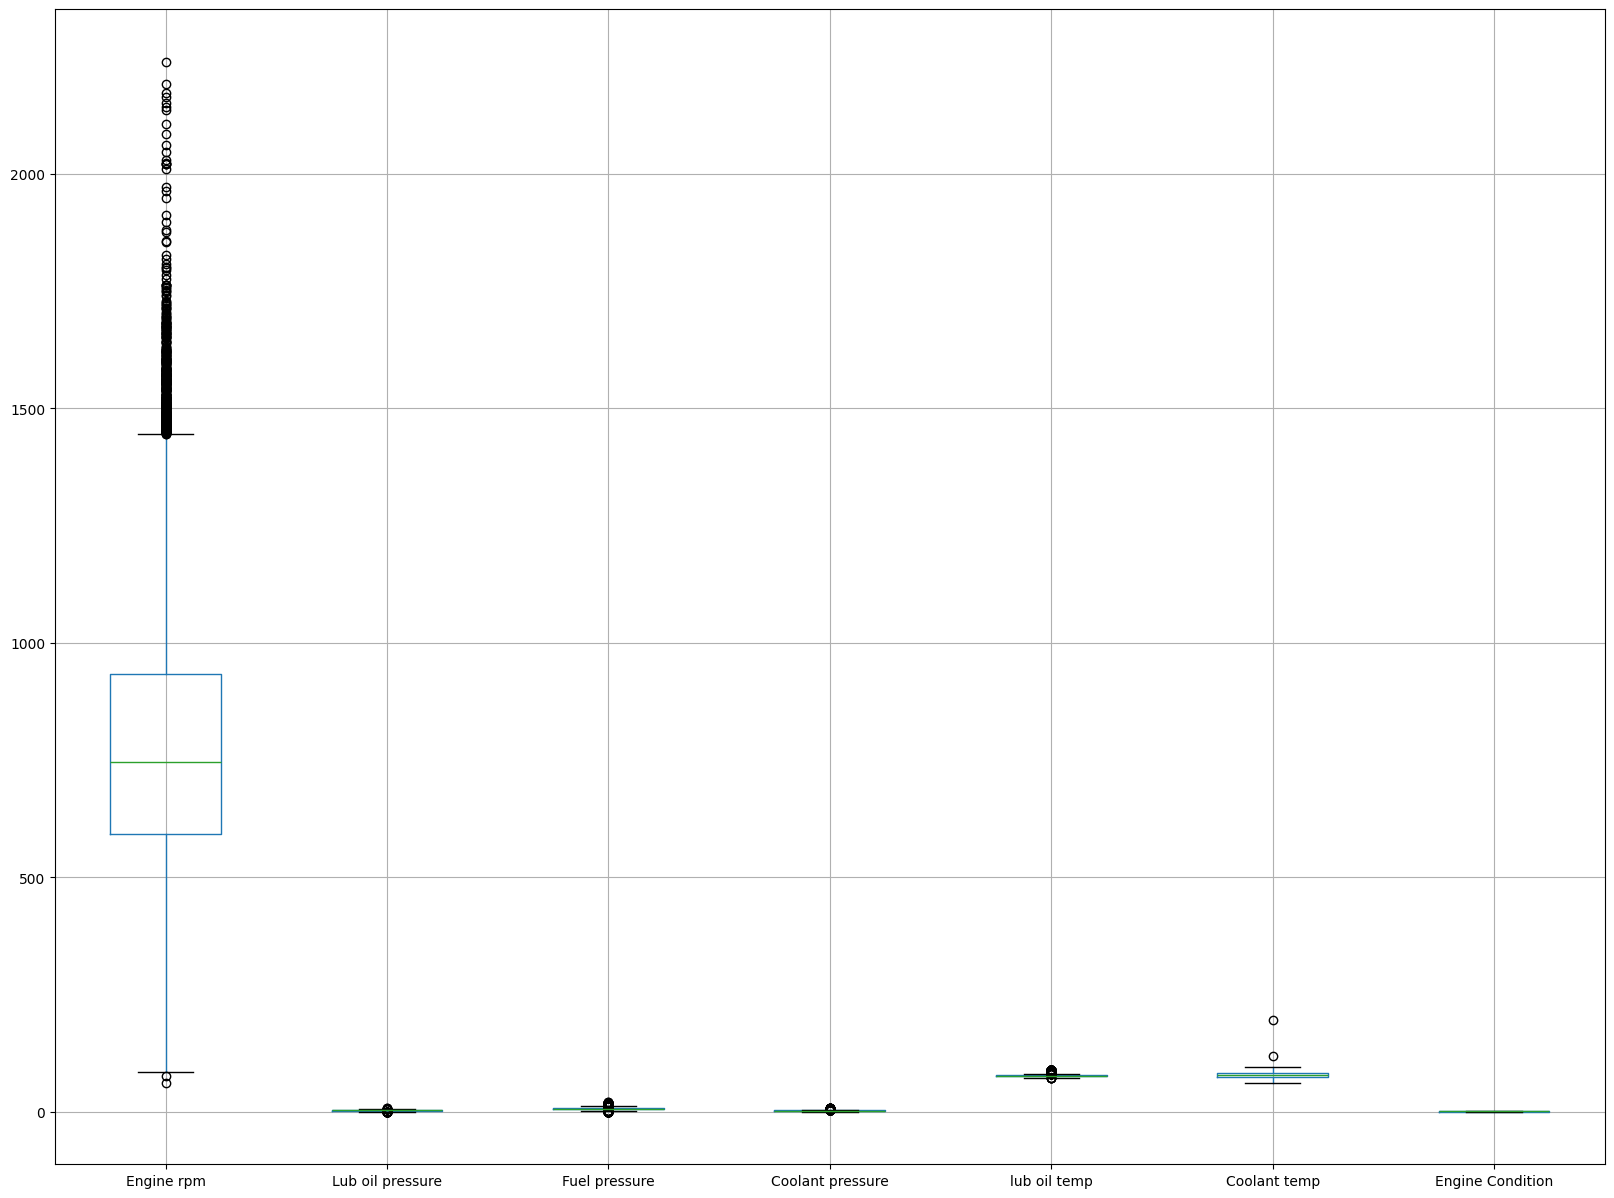

In [8]:
#Check for Outliers
plt.figure(figsize=(20,15))
data.boxplot()
plt.show()

In [9]:
#use interquantile range to check
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Engine rpm          341.000000
Lub oil pressure      1.536457
Fuel pressure         2.828087
Coolant pressure      1.248374
lub oil temp          2.345700
Coolant temp          9.019990
Engine Condition      1.000000
dtype: float64


In [10]:
data.head(10)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
5,1221,3.989226,6.679231,2.214250,76.401152,75.669818,0
6,716,3.568896,5.312266,2.461067,83.646589,79.792411,1
7,729,3.845166,10.191126,2.362998,77.921202,71.671761,1
8,845,4.877239,3.638269,3.525604,76.301626,70.496024,0
9,824,3.741228,7.626214,1.301032,77.066520,85.143297,0


***Feature Scaling and Data Spliting***

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Convert data to numpy array
data = np.array(data)

# Split the dataset into features (X) and target variable (y)
X = data[:, :-1]
y = data[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Min-Max scaling to features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for LSTM (samples, time steps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


***MODEL DEVELOPMENT***

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

# Define the model
model = Sequential()
model.add(Bidirectional(LSTM(units=256, return_sequences=True), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(LSTM(units=128, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=16, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
880/880 [==============================] - 13s 11ms/step - loss: 0.6207 - accuracy: 0.6558 - val_loss: 0.6051 - val_accuracy: 0.6660
Epoch 2/10
880/880 [==============================] - 9s 10ms/step - loss: 0.6095 - accuracy: 0.6610 - val_loss: 0.6034 - val_accuracy: 0.6718
Epoch 3/10
880/880 [==============================] - 9s 10ms/step - loss: 0.6096 - accuracy: 0.6635 - val_loss: 0.6089 - val_accuracy: 0.6699
Epoch 4/10
880/880 [==============================] - 10s 11ms/step - loss: 0.6072 - accuracy: 0.6584 - val_loss: 0.6062 - val_accuracy: 0.6699
Epoch 5/10
880/880 [==============================] - 9s 10ms/step - loss: 0.6069 - accuracy: 0.6639 - val_loss: 0.6105 - val_accuracy: 0.6743
Epoch 6/10
880/880 [==============================] - 9s 10ms/step - loss: 0.6045 - accuracy: 0.6644 - val_loss: 0.6031 - val_accuracy: 0.6737
Epoch 7/10
880/880 [==============================] - 9s 10ms/step - loss: 0.6036 - accuracy: 0.6690 - val_loss: 0.6021 - val_accuracy: 0.66